In [3]:
import pandas as pd 
import numpy as np

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")

Task 1 : Advanced Exploratory Data Analysis (EDA) and Feature Engineering 

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
np.random.seed(42)
for cols in ["sqft_lot", "bathrooms"]:
    rows = data.sample(frac = 0.05, random_state=np.random.randint(0, 10000)).index
    data.loc[rows, cols] = np.nan

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      20532 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       20532 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data['bathrooms'].isnull().sum()

np.int64(1081)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      20532 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       20532 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

 Outlier Detection and Handling:
○ Create boxplots for price, sqft_living, and bedrooms.
○ Identify and remove egregious outliers. A common rule is to remove
data points that lie beyond 1.5timesIQR (Interquartile Range) from the
first or third quartile. Justify your outlier removal strategy. For
instance, does a house with 33 bedrooms seem plausible?

In [8]:
import matplotlib.pyplot as plt

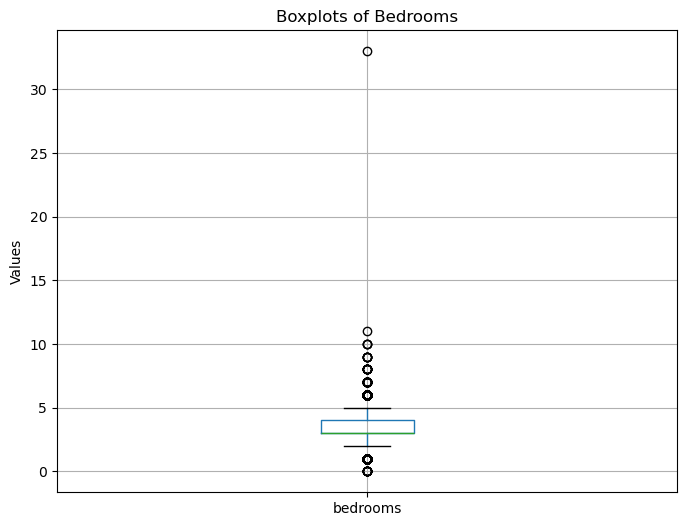

In [9]:
plt.figure(figsize=(8, 6))
data[["bedrooms"]].boxplot()
plt.title("Boxplots of Bedrooms")
plt.ylabel("Values")
plt.show()

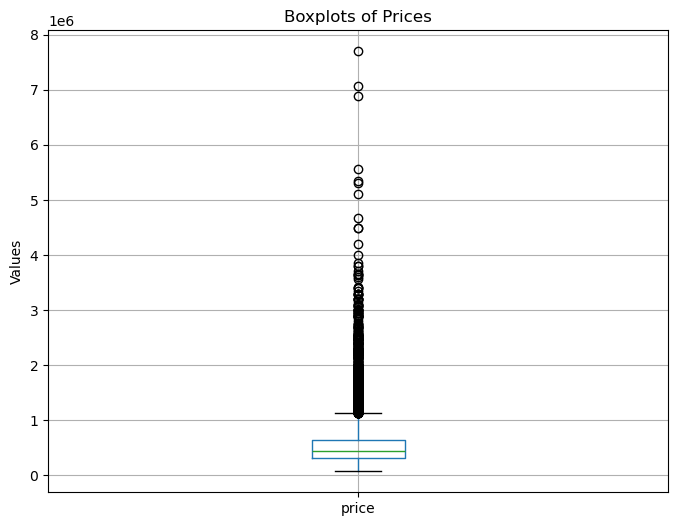

In [16]:
plt.figure(figsize=(8, 6))
data[["price"]].boxplot()
plt.title("Boxplots of Prices")
plt.ylabel("Values")
plt.show()

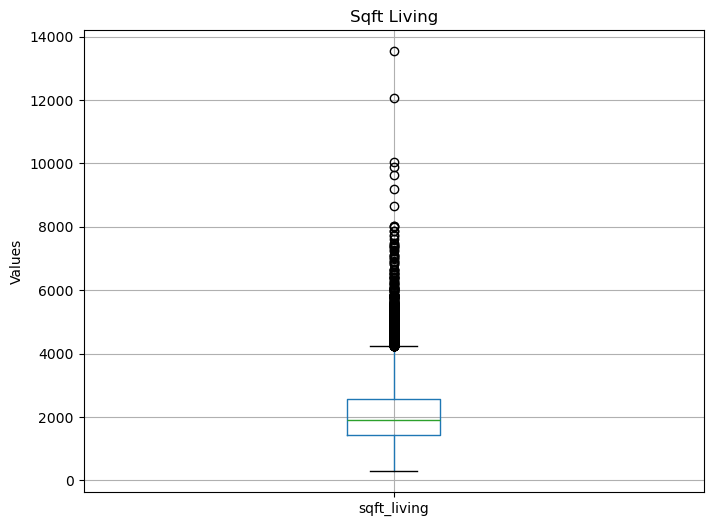

In [10]:
plt.figure(figsize=(8, 6))
data[["sqft_living"]].boxplot()
plt.title("Sqft Living")
plt.ylabel("Values")
plt.show()

In [11]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data_clean = data[(data[column] >= lower) & (data[column] <= upper)]
    return data_clean

In [12]:
data = remove_outliers(data, 'price')
data = remove_outliers(data, 'sqft_living')
data = remove_outliers(data, 'bedrooms')

In [13]:
data.shape

(19687, 21)

In [14]:
data['bedrooms'].unique()

array([3, 2, 4, 5])

In [15]:
data['price'].nunique()

3438

In [16]:
data['sqft_living'].nunique()

752

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19687 non-null  int64  
 1   date           19687 non-null  object 
 2   price          19687 non-null  float64
 3   bedrooms       19687 non-null  int64  
 4   bathrooms      18694 non-null  float64
 5   sqft_living    19687 non-null  int64  
 6   sqft_lot       18694 non-null  float64
 7   floors         19687 non-null  float64
 8   waterfront     19687 non-null  int64  
 9   view           19687 non-null  int64  
 10  condition      19687 non-null  int64  
 11  grade          19687 non-null  int64  
 12  sqft_above     19687 non-null  int64  
 13  sqft_basement  19687 non-null  int64  
 14  yr_built       19687 non-null  int64  
 15  yr_renovated   19687 non-null  int64  
 16  zipcode        19687 non-null  int64  
 17  lat            19687 non-null  float64
 18  long       

2. Advanced Feature Engineering: Create the following new features, as they
often provide more predictive power than raw data:
○ Date-Based Features: Do not drop the date column. Convert it to a
datetime object and engineer the following:

■ sale_year: The year the house was sold.
■ sale_month: The month the house was sold.
■ house_age: The age of the house at the time of sale (sale_year -
yr_built).

In [17]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

In [18]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
data['sale_year'] = data['date'].dt.year

In [20]:
data['sale_month'] = data['date'].dt.month

In [21]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [22]:
data['house_age'] = (data['sale_year'] - data['yr_built'])

In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


○ Renovation Status:
■ was_renovated: A binary feature (1 if yr_renovated is not 0,
else 0).
■ age_since_renovation: Years since renovation. If never
renovated, this could be the same as house_age. Think about the
best way to handle this.

In [24]:
data['was_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [25]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,28,0


In [26]:
# age since renovation: Years since renovation. If never renovated, this could be the same as 
# house age. Think about the best way to handle this.
def calc_age_since_renovation(row):
    if row['yr_renovated'] == 0:  # never renovated
        return row['house_age']
    else:
        return row['sale_year'] - row['yr_renovated']
data['age_since_renovation'] = data.apply(calc_age_since_renovation, axis=1)

In [27]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,59,0,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,63,1,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,82,0,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,49,0,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,28,0,28


○ Ratio Features: Create at least two insightful ratio features. For
example:
■ sqft_living_per_floor: sqft_living / floors. (Handle cases where
floors might be 0).
■ bath_per_bed: bathrooms / bedrooms. (Handle cases where
bedrooms might be 0).

In [28]:
data['sqft_living_per_floor'] = data['sqft_living'] / data['floors'].replace(0, np.nan)
data['bath_per_bed'] = data['bathrooms'] / data['bedrooms'].replace(0, np.nan)

In [29]:
data['bath_per_bed'].unique()

array([0.33333333, 0.75      , 0.5       , 0.66666667, 0.83333333,
       0.58333333, 0.4       ,        nan, 0.25      , 0.4375    ,
       0.625     , 0.6875    , 0.55      , 0.875     , 0.45      ,
       0.65      , 0.91666667, 1.        , 1.08333333, 1.125     ,
       0.375     , 1.16666667, 0.5625    , 0.7       , 1.25      ,
       0.8       , 0.35      , 0.6       , 1.41666667, 0.8125    ,
       1.5       , 0.3       , 1.375     , 0.2       , 0.41666667,
       0.9375    , 0.95      , 1.625     , 1.0625    , 0.9       ,
       1.33333333, 0.85      , 0.125     , 1.1875    , 0.1875    ,
       1.75      ])

Task 2: Build a Sophisticated Preprocessing Pipeline
1. Identify Feature Types: After your feature engineering in Task 1, categorize
your final columns into three groups:
○ Numerical Features: Continuous variables that need imputation and
scaling (e.g., sqft_living, house_age, sqft_lot).
○ Categorical Features: Features that should be treated as categories, not
numbers (e.g., zipcode).
○ Passthrough Features: Features you believe don't need scaling or
encoding but are still useful (e.g., grade, condition, was_renovated).

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [31]:
cols_to_int = ['bedrooms', 'floors', 'view', 'condition', 'grade', 'waterfront']
data[cols_to_int] = data[cols_to_int].astype(int)

In [32]:
numerical_features = [
    'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'lat', 'long',
    'house_age', 'age_since_renovation',
    'sqft_living_per_floor', 'bath_per_bed', 'bedrooms', 
    'floors', 'view', 'waterfront'
]

categorical_features = ['zipcode']

passthrough_features = ['grade', 'condition', 'was_renovated']

2. Create Preprocessing Pipelines for Each Type:

○ Numerical Pipeline: Create a Pipeline that first imputes missing values
(using SimpleImputer with a median strategy) and then scales the data
(using StandardScaler).
○ Categorical Pipeline: Create a Pipeline that applies OneHotEncoder to
the zipcode column. Set handle_unknown='ignore' to prevent errors if
the test set contains a zipcode not seen in the training set.

In [33]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

3. Combine Pipelines with ColumnTransformer:
○ Use ColumnTransformer to apply your numerical pipeline to the
numerical columns, your categorical pipeline to the categorical
columns, and specify 'passthrough' for the passthrough columns.
○ This ColumnTransformer will be the first step in your final modeling
pipeline.

In [35]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features),
    ('pass', 'passthrough', passthrough_features)
])

Task 3: Model Training and Hyperparamter Tuning

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
X = data.drop("price", axis=1)
y = data["price"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 20]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__max_depth': [3, 6],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

In [41]:
results = []
best_overall_rmse = np.inf
best_model_name = None
best_model_pipeline = None

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRunning GridSearchCV for {name}...")
    grid.fit(X_train, y_train)
    
    best_cv_rmse = -grid.best_score_
    
    y_pred = grid.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'model': name,
        'best_params': grid.best_params_,
        'cv_rmse': best_cv_rmse,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'test_mae': test_mae
    })
    
    print(f"{name} done. CV RMSE: {best_cv_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    
    if best_cv_rmse < best_overall_rmse:
        best_overall_rmse = best_cv_rmse
        best_model_name = name
        best_model_pipeline = grid.best_estimator_

results_df = pd.DataFrame(results).sort_values('test_rmse')
results_df.to_csv("model_results.csv", index=False)

print(f"\nBest overall model: {best_model_name} with CV RMSE = {best_overall_rmse:.4f}")


Running GridSearchCV for RandomForest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
RandomForest done. CV RMSE: 78320.1087 | Test RMSE: 76006.7825

Running GridSearchCV for GradientBoosting...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GradientBoosting done. CV RMSE: 76913.4618 | Test RMSE: 76421.7003

Running GridSearchCV for XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
XGBoost done. CV RMSE: 74310.5557 | Test RMSE: 73061.6842

Best overall model: XGBoost with CV RMSE = 74310.5557


In [42]:
y_pred = best_model_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Test R2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Best Model: XGBoost
Test R2: 0.8723
Test MAE: 52006.9294
Test RMSE: 73061.6842


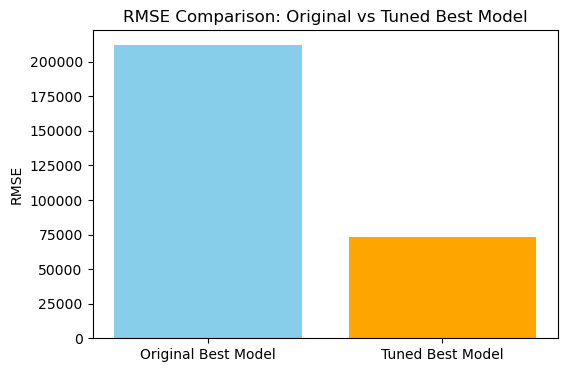

Percentage Improvement in RMSE: 65.56%


In [43]:
import matplotlib.pyplot as plt

original_best_rmse = 212131.231023  # Replace with actual RMSE from original notebook
final_rmse = test_rmse

# Bar chart comparison
models = ['Original Best Model', 'Tuned Best Model']
rmses = [original_best_rmse, final_rmse]

plt.figure(figsize=(6,4))
plt.bar(models, rmses, color=['skyblue', 'orange'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison: Original vs Tuned Best Model')
plt.show()

# Percentage improvement
improvement = ((original_best_rmse - final_rmse) / original_best_rmse) * 100
print(f"Percentage Improvement in RMSE: {improvement:.2f}%")


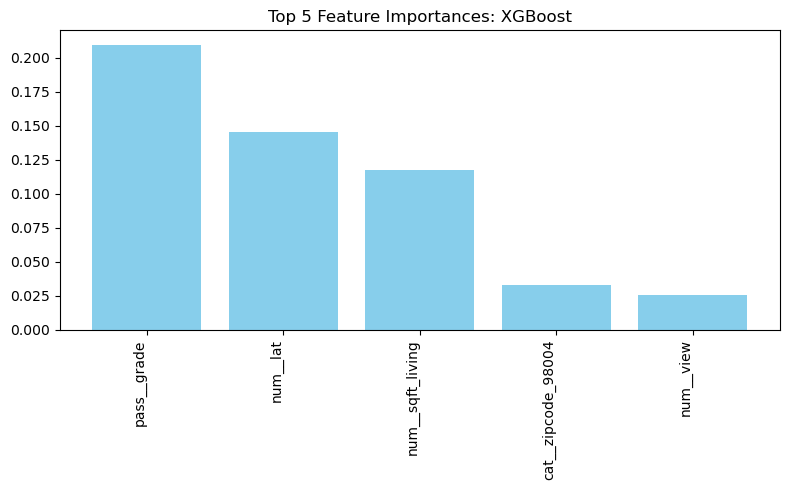

In [45]:
tree_models = ['RandomForest', 'GradientBoosting', 'XGBoost']

if best_model_name in tree_models:
    regressor = best_model_pipeline.named_steps['regressor']
    importances = regressor.feature_importances_
    
    preprocessor = best_model_pipeline.named_steps['preprocessor']
    feature_names = preprocessor.get_feature_names_out()
    
    indices = np.argsort(importances)[::-1]
    
    top_n = 5
    indices = indices[:top_n]
    
    plt.figure(figsize=(8,5))
    plt.bar(range(top_n), importances[indices], color='skyblue')
    plt.xticks(range(top_n), feature_names[indices], rotation=90, ha="right")
    plt.title(f'Top {top_n} Feature Importances: {best_model_name}')
    plt.tight_layout()
    plt.show()

Summary: 

1. The most influential feature in predicting the target is pass_grade, followed by num_lat and num_sqft_living.

2. Location-related features like cat_zipcode_98004 have moderate impact on predictions.

3. num_view contributes the least among the top five features but still adds some predictive value.

The features largely make sense as location, size, and quality metrics are expected to influence the target variable.

Yes, some engineered features appear in the top 5, such as num__lat (latitude) and num__view, showing that feature engineering helped capture important patterns.